# Library Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables

In [3]:
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

# First tests

In [4]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"

In [5]:
#p = Path(p3fold)#.glob('**/*')
#T_list = sorted( [int(x.name[1:]) for x in p.iterdir() if x.is_dir() and x.name.startswith('T')] )
#bb_pathList = [f"{p3fold}T{T}" for T in T_list]
#
#T_list
#bb_pathList


In [6]:
#sorted( [str(f.absolute()) for f in folders] )

In [7]:
ok = moments_toolkit(p3fold,p2fold,maxConf=3,verbose=True)


Initializing the moments_toolkit class instance...



Reading data for T = 6 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 3/3 [00:06<00:00,  2.26s/it]



Looping over the configurations to read the 2-point correlators from the h5 files...



100%|██████████| 3/3 [00:00<00:00, 85.35it/s]




Reading data for T = 7 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 3/3 [00:06<00:00,  2.25s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 8 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 3/3 [00:06<00:00,  2.28s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 10 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 3/3 [00:07<00:00,  2.47s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 12 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 3/3 [00:06<00:00,  2.26s/it]



Two-point correlators retrieved from previous class instance...


Building the list of all available operators...


Class Initialization Complete!



In [8]:
bblist = ok.bb_list

[bb.nconf for bb in bblist]

[3, 3, 3, 3, 3]

In [9]:
ok.operator_show(show=True, verbose=True)


Generating the operators catalogue ...


Operators catalogue generated


Operators catalogue shown


Operators catalogue available in operator_catalogue.pdf



In [10]:
#ok.operator_show(remove_pdf=True, verbose=True)

In [11]:
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')

f = x**3 + x

f.simplify()

f.subs({x**3:y})

f

x**3 + x

x + y

x**3 + x

In [12]:
[i for i in range(2,10)]

[2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
type(f)

sympy.core.add.Add

In [14]:
op2 = ok.operator_list[1]

In [15]:
op2.id

2

In [16]:
len(ok.operator_list)

224

In [17]:
type(ok)

moments_toolkit.moments_toolkit

In [18]:
type(ok.operator_list)

type(ok.operator_list[1].id)

print(ok.operator_list[1].id)

list

int

2


In [19]:
ok.operator_list[1].O

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

In [20]:
np.shape(ok.operator_list)

(224,)

In [21]:
ok.selected_op = []
#ok.select_operator(2,11)
ok.select_operator(28,32)

In [22]:
ok.selected_op[1].K

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

In [23]:
type(ok.selected_op[1].O)
type(ok.selected_op[1].K)

sympy.core.add.Add

sympy.core.mul.Mul

In [24]:
[display(l.O) for l in ok.selected_op]

1.0*O[1, 3] + 1.0*O[3, 1]

1.0*O[3, 4] + 1.0*O[4, 3]

[None, None]

In [25]:
import sympy as sym
sym.pprint(ok.selected_op[1].O)

1.0⋅O[3, 4] + 1.0⋅O[4, 3]


In [26]:
ok.selected_op

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3]]

In [27]:
np.shape( np.zeros(shape=(0,5,5),dtype=complex) )

(0, 5, 5)

In [28]:
okR = ok.get_R()

In [29]:
okR[0,0,0,:ok.T_list[0]+1]

array([-0.12857833+0.02184363j, -0.05500077+0.06200085j,
       -0.02850342+0.06846329j, -0.01334324+0.08485101j,
        0.02092891+0.09253396j,  0.01905115-0.01277117j,
       -0.0408818 -0.05416485j])

In [30]:
np.shape(okR)[:-1]

(2, 3, 5)

In [33]:
okS = ok.get_S(1)
okS
okS = ok.get_S(2)
okS
okS = ok.get_S(3)
okS
np.shape(okS)

array([[[-0.05686736+0.29507795j, -0.26104415+0.16767543j,
         -0.79772321-0.69231068j, -0.24241495-0.04996331j,
         -1.95898489+1.56405696j],
        [-0.01951236-0.03011787j, -0.08316471-0.16006757j,
          0.00755079-0.25092091j,  1.43669926-1.25388585j,
         -0.65760623-2.52615321j],
        [ 0.22959093+0.17343384j,  0.17992973+0.37108637j,
          0.14133915+0.29017307j, -0.15311922-0.77362014j,
          0.73862802-3.10263592j]],

       [[-0.39539905-3.50346677j, -1.00562866-5.25977057j,
         -0.23493316-4.19074263j,  0.30837698-5.89640502j,
         -0.33079849-4.27238947j],
        [-0.16795813-2.8192555j , -0.13087923-3.49634582j,
          0.34218485-4.58585203j,  0.99375704-3.64556887j,
          1.88747533-5.18997453j],
        [-0.07462954-2.89127777j,  0.38411702-3.30928689j,
          0.40946118-4.08236904j,  0.79477638-4.53490322j,
          2.16298616-8.91507534j]]])

array([[[-0.02091775+0.24584827j, -0.14236319+0.4076426j ,
         -0.76089356-0.02747224j, -0.69202182-0.40653086j,
         -1.14021126+0.76830098j],
        [ 0.03401663-0.04768765j,  0.04595013-0.14184026j,
          0.12345098-0.16527196j,  1.23259469-0.97998439j,
          0.02051928-2.32460141j],
        [ 0.17787276+0.11145214j,  0.11895233+0.26474251j,
          0.04269317+0.14777377j,  0.01845268-0.76584688j,
          0.66291675-2.8193316j ]],

       [[-0.21321821-1.98899727j, -0.70929286-3.28243154j,
          0.07154262-2.81775945j,  0.88385439-4.48627278j,
         -0.20685107-3.53269465j],
        [-0.12240533-1.54336956j, -0.06233506-2.18343053j,
          0.32745638-3.20204388j,  1.09126889-2.67235434j,
          2.43279437-3.63459553j],
        [-0.09720707-1.6252876j ,  0.26540589-2.07244574j,
          0.34773474-2.8043152j ,  0.64720832-3.44484964j,
          2.42989901-7.20594983j]]])

array([[[-0.01334324+0.08485101j, -0.07930342+0.36995736j,
         -0.55907713+0.48851099j, -0.9687794 -0.57895546j,
         -0.93968551-0.06265719j],
        [ 0.01820739-0.03444771j,  0.05324643-0.09867185j,
          0.18349389-0.04266978j,  1.07103432-0.74292432j,
          0.26181639-1.9508096j ],
        [ 0.07742693+0.02845418j,  0.04789154+0.12830692j,
         -0.05854913+0.09603192j,  0.0485591 -0.66708717j,
          0.51718679-2.37093272j]],

       [[-0.06704398-0.66065196j, -0.49310016-1.68743429j,
          0.08697341-1.5091458j ,  0.98492623-2.97154199j,
          0.05895754-3.10719992j],
        [-0.04738375-0.49068536j, -0.02502733-1.10000366j,
          0.23596204-1.99676003j,  1.07428678-2.0136101j ,
          2.44753253-2.80880318j],
        [-0.04274423-0.54195017j,  0.14836802-1.02461573j,
          0.29995466-1.69855742j,  0.5243044 -2.56202968j,
          2.34572565-6.22382537j]]])

(2, 3, 5)

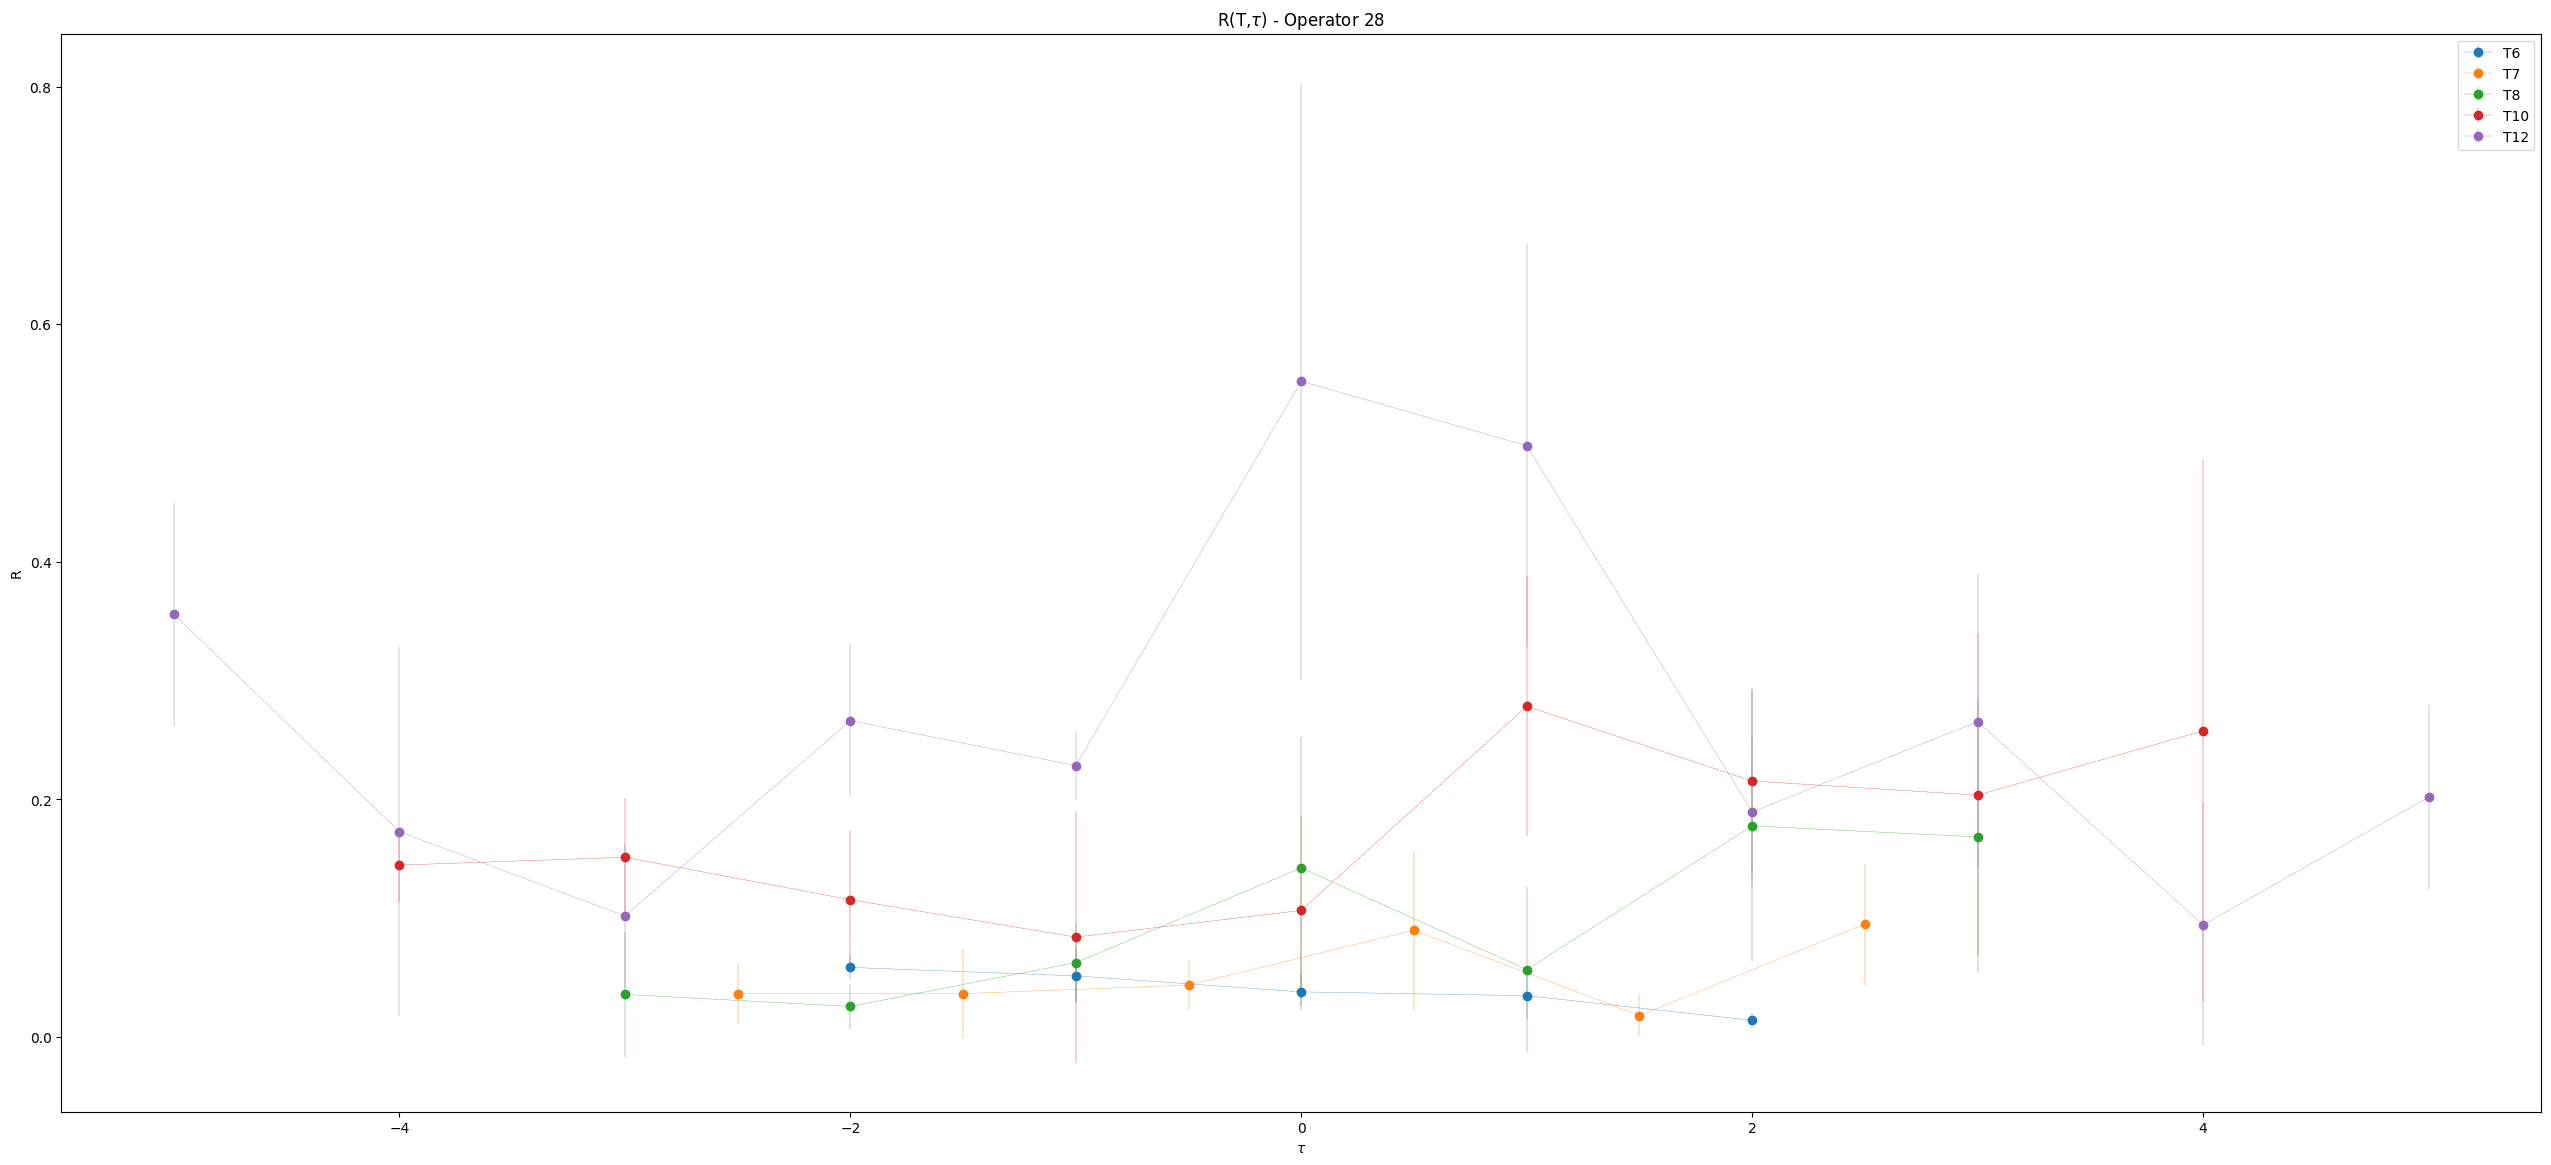

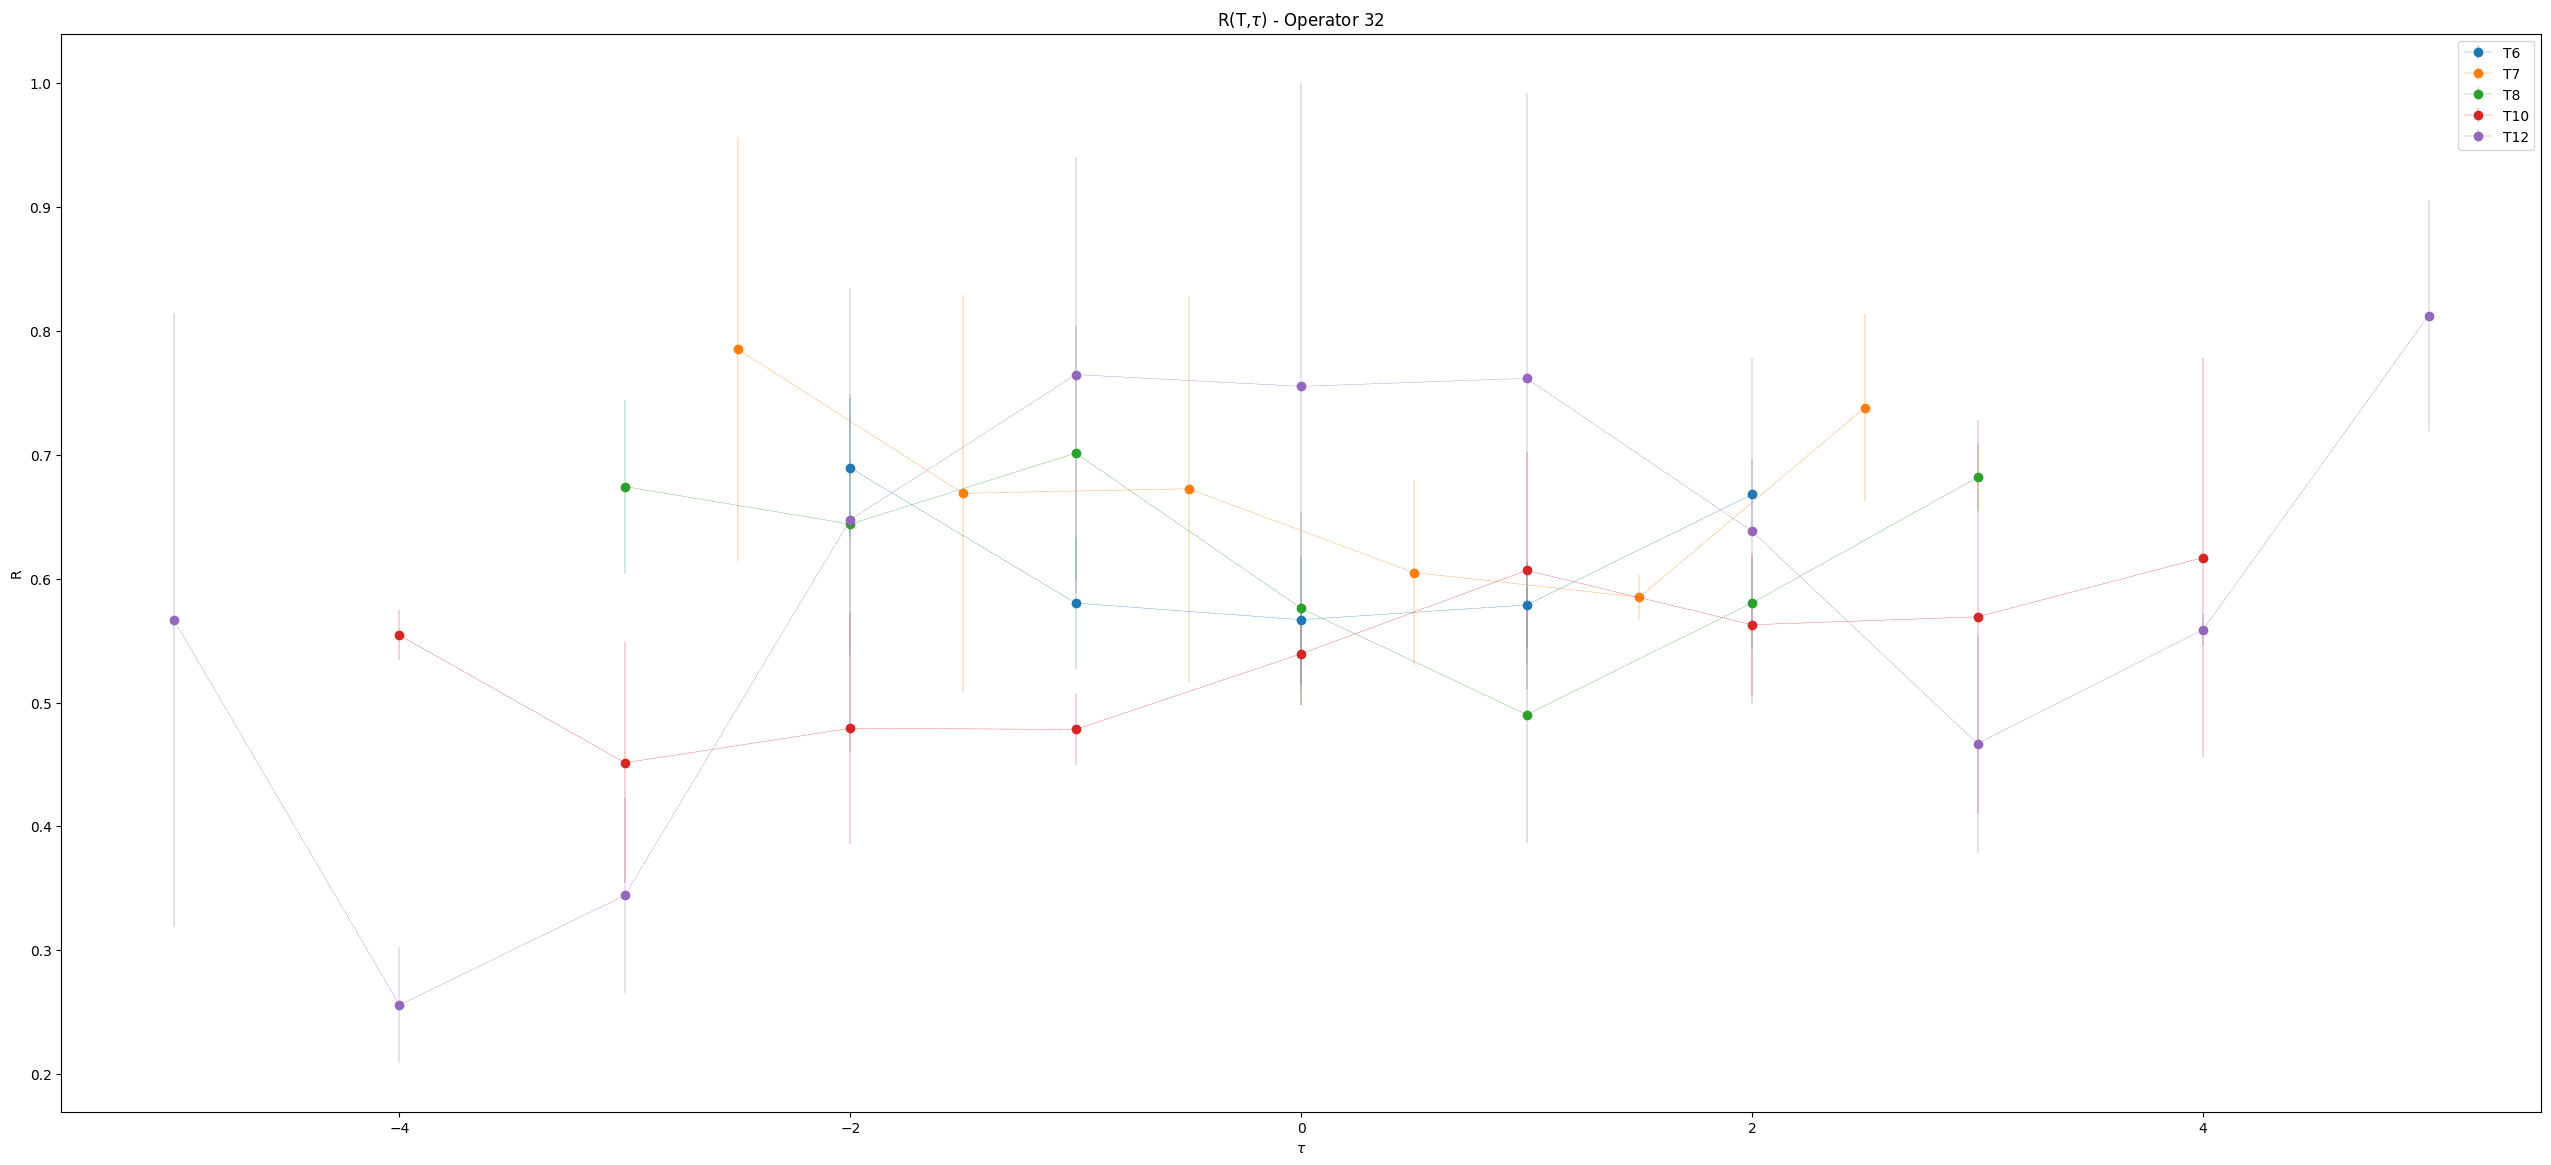

In [32]:
ok.plot_R()